In [1]:
planet = open("mystery_planet.txt")

IOStream(<file mystery_planet.txt>)

In [2]:
data = readdlm(planet) ;

In [3]:
close(planet)

In [4]:
time = data[:,1]
rv = data[:,2]
err = data[:,3] ;

In [5]:
using PyPlot

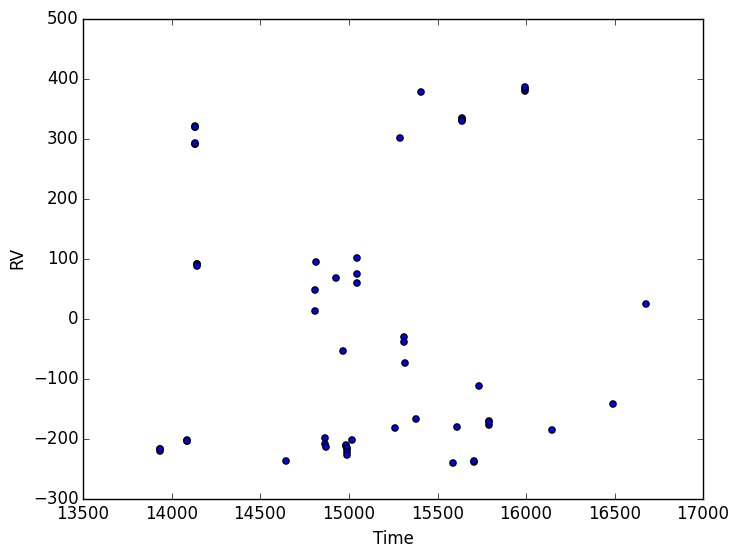

PyObject <matplotlib.text.Text object at 0x31ede7190>

In [7]:
scatter(time, rv)
xlabel("Time")
ylabel("RV")

In [5]:
#Kepler's equation solver function from Homework 1
function Kepler(M, e)
    E_old = M
    epsilon = 1.0
    while epsilon > 1.0E-12
        g = E_old - e*sin(E_old) - M
        g_prime = 1.0 - e*cos(E_old)
        E_new = E_old - (g/g_prime)
        epsilon = abs(E_old - E_new)/E_old
        E_old = E_new
    end
    return E_old
end

Kepler (generic function with 1 method)

In [6]:
function Period(time, rv)
    num = 3000
    periods = linspace(50.0, 300.0, num)
    chisq = ones(num)
    for i in range(1, num)
        mods = mod(time, periods[i])
        ind = sortperm(mods)
        newrv = rv[ind]
        sum = 0.0
        for k in range(1,length(time)-1)
            sum += (newrv[k+1]-newrv[k])^2.
        end
        chisq[i] = sum
    end
    #scatter(periods,chisq)
    #yscale("log")
    
    return periods[indmin(chisq)] 
end

Period (generic function with 1 method)

In [10]:
Period(time,rv)

116.85561853951317

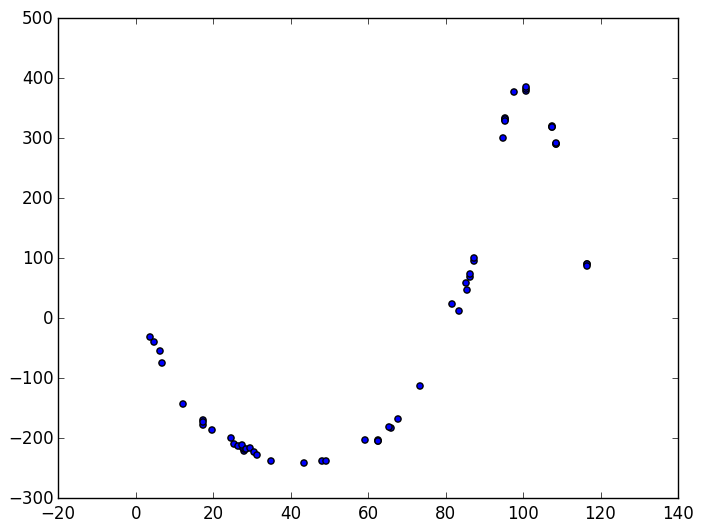

PyObject <matplotlib.collections.PathCollection object at 0x31f020890>

In [11]:
per = Period(time,rv)
scatter(mod(time,per),rv)

In [154]:
K = (maximum(rv)-minimum(rv))/2.0

313.8

In [ ]:
function ffunc(time,time_0, per)
    del_M = (2.0*pi / per)*(time-time_0)

In [7]:
#Define parameter vector p[Period1, eccentricity2, time of periastron3, h4, c5, v_06]

function vrad(t, p)
    rv_model = ones(length(t))
    for i in range(1, length(t))
        M = 2.0*pi / p[1] * (t[i] - p[3])
        E = Kepler(M, p[2])
        f = 2.0 * atan(((1.0 - p[2])/(1.0 + p[2]))^0.5 * tan(E/2.0))
        rv_model[i] = p[4]*cos(f) + p[5]*sin(f) + p[6]
    end
    return rv_model
end

vrad (generic function with 1 method)

In [8]:
using LsqFit

In [9]:
#p = [period, ecc, t_peri, h, c, v0]
#Define initial guesses:
p = ones(6)
p[1] = Period(time,rv)
p[2] = 0.5
p[3] = p[1] / 2.0
p[4] = 1.0
p[5] = 1.0
p[6] = 1.0

errors = 1.0./(err.^2.0);
println(typeof(errors))
#vrad_model = vrad(time, p)
#scatter(time,rv)
#plot(time,vrad_model)

Array{Any,1}


In [11]:
model(x,p) = vrad(x,p)

model (generic function with 1 method)

In [12]:
fit = curve_fit(model,time,rv,p)

LoadError: LoadError: MethodError: `finite_difference_jacobian!` has no method matching finite_difference_jacobian!(::Function, ::Array{Float64,1}, ::Array{Any,1}, ::Array{Float64,2}, ::Symbol)
Closest candidates are:
  finite_difference_jacobian!{R<:Number,S<:Number,T<:Number}(::Function, ::Array{R<:Number,1}, !Matched::Array{S<:Number,1}, ::Array{T<:Number,N}, ::Symbol)
  finite_difference_jacobian!{R<:Number,S<:Number,T<:Number}(::Function, ::Array{R<:Number,1}, !Matched::Array{S<:Number,1}, ::Array{T<:Number,N})
while loading In[12], in expression starting on line 1

In [38]:
for i in range(1,length(time))
    println(time[i])
end

13933.82196
13933.82264
13933.82336
14085.16632
14085.16702
14085.16775
14130.12242
14130.12308
14130.12372
14131.11653
14131.11724
14131.11797
14139.10185
14139.1025
14139.10312
14641.84867
14807.16184
14809.16606
14811.16959
14865.09274
14866.06558
14868.10796
14927.00429
14963.76892
14983.92452
14984.93831
14985.93592
14986.92704
14987.92941
14988.8737
15016.74253
15042.73366
15043.74347
15044.77665
15256.94773
15286.01509
15311.80566
15312.79832
15314.85494
15375.75214
15405.73625
15585.18842
15607.18024
15636.97057
15636.97113
15636.97172
15636.97232
15706.7334
15707.73062
15731.94048
15792.72022
15792.7208
15792.72139
15993.02461
15993.02698
15993.03026
16145.72624
16488.73474
16675.1871


In [11]:
t

LoadError: LoadError: UndefVarError: t not defined
while loading In[11], in expression starting on line 1